In [3]:
import os
import zipfile
import urllib.request

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
filename = 'UCI_HAR_Dataset.zip'
urllib.request.urlretrieve(url, filename)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('UCI_HAR_Dataset')

os.listdir('UCI_HAR_Dataset')


['UCI HAR Dataset', '__MACOSX']

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler

base_path = 'UCI_HAR_Dataset/UCI HAR Dataset'

X_train = pd.read_csv(f'{base_path}/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv(f'{base_path}/train/y_train.txt', delim_whitespace=True, header=None)

X_test = pd.read_csv(f'{base_path}/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv(f'{base_path}/test/y_test.txt', delim_whitespace=True, header=None)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = tf.keras.utils.to_categorical(y_train - 1)
y_test = tf.keras.utils.to_categorical(y_test - 1)


In [5]:

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # 6 farklı aktivite sınıfı

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=64, validation_split=0.2)

loss, accuracy = model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
92/92 [==============================] - 163s 2s/step - loss: 1.2151 - accuracy: 0.3918 - val_loss: 1.0864 - val_accuracy: 0.4888
Epoch 2/10
92/92 [==============================] - 167s 2s/step - loss: 0.9799 - accuracy: 0.5324 - val_loss: 0.8151 - val_accuracy: 0.7274
Epoch 3/10
92/92 [==============================] - 191s 2s/step - loss: 0.7120 - accuracy: 0.6907 - val_loss: 0.8751 - val_accuracy: 0.7070
Epoch 4/10
92/92 [==============================] - 162s 2s/step - loss: 0.7101 - accuracy: 0.6944 - val_loss: 0.8067 - val_accuracy: 0.7525
Epoch 5/10
92/92 [==============================] - 168s 2s/step - loss: 0.5620 - accuracy: 0.7553 - val_loss: 0.7329 - val_accuracy: 0.7927
Epoch 6/10
92/92 [==============================] - 163s 2s/step - loss: 0.5310 - accuracy: 0.7823 - val_loss: 0.7589 - val_accuracy: 0.7886
Epoch 7/10
92/92 [==============================] - 166s 2s/step - loss: 0.4705 - accuracy: 0.8106 - val_loss: 0.6972 - val_accuracy: 0.8239
Epoch 8/10
92

1/1 [==============================] - 0s 237ms/step


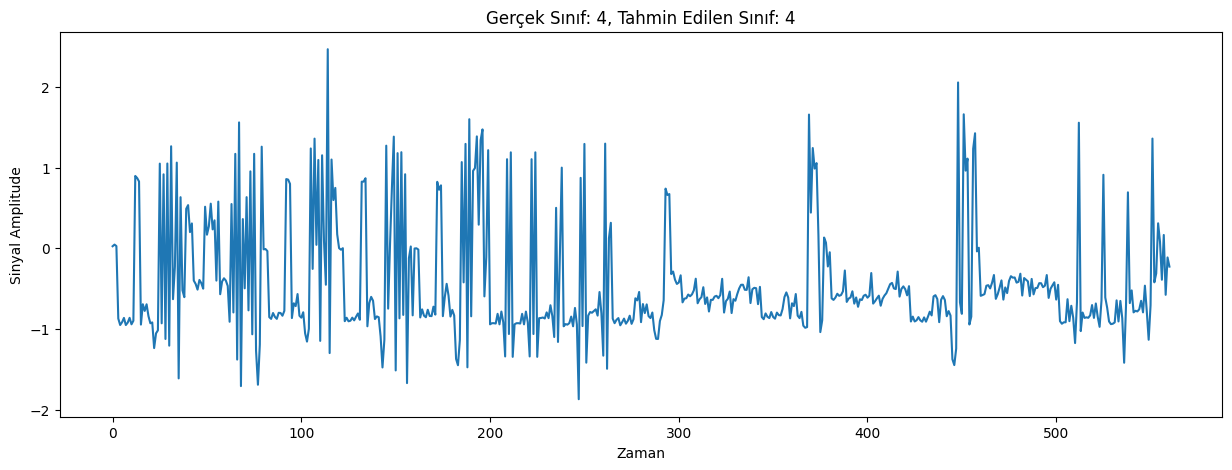

Gerçek Sınıf: Oturma
Tahmin Edilen Sınıf: Oturma


In [15]:
import matplotlib.pyplot as plt


sample_index = np.random.randint(0, X_test.shape[0])
sample_signal = X_test[sample_index]


prediction = model.predict(sample_signal.reshape(1, -1, 1))
predicted_class = np.argmax(prediction) + 1

true_class = np.argmax(y_test[sample_index]) + 1


plt.figure(figsize=(15, 5))
plt.plot(sample_signal)
plt.title(f"Gerçek Sınıf: {true_class}, Tahmin Edilen Sınıf: {predicted_class}")
plt.xlabel('Zaman')
plt.ylabel('Sinyal Amplitude')
plt.show()


class_names = ['Yürüme', 'Merdiven Çıkma', 'Merdiven İnme', 'Oturma', 'Ayakta Durma', 'Yatma']

print(f"Gerçek Sınıf: {class_names[true_class - 1]}")
print(f"Tahmin Edilen Sınıf: {class_names[predicted_class - 1]}")